## 1. Load the data

In [1]:
# imports:
import pandas as pd
import matplotlib.pyplot as plt

INPUT_CSV = '/home/sramkova/diploma_thesis_data/neighbourhood_both_days_ssh_guess.csv'

raw_data = pd.read_csv(INPUT_CSV, low_memory=False)

# check that all columns are correctly loaded
raw_data.head()

originated_ip       uid      connection.uid connection.conn_state  \
0  74.117.199.102     0xaf7  Cx7By32e9pfz8B7UE9                   OTH   
1    212.45.97.31  0x15698c  C60CE42M3tvr3eyYv3                   OTH   
2   192.168.10.25       0xb   CAvtQMv0jwrkrA7Ce                    SF   
3   192.168.10.25      0x16  CEkwZu4YVYZwxhTWUk                    SF   
4   192.168.10.25      0x2f   CtVePI5qOjDFcmrg8                    SF   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             3.000025                     84                       168   
1            31.921464                    224                       448   
2             0.081260                   1244                      5216   
3             0.626921                    903                      2059   
4             0.611511                    636                      2000   

   connection.orig_p  connection.orig_pkts connection.proto  ...  \
0                  3                     3             icmp  ...   
1                  3                     8             icmp  ...   
2              52475                    52              tcp  ...   
3              50531                    22              tcp  ...   
4              50545                    26              tcp  ...   

   resp_resp_similar_http_method_count  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   resp_resp_similar_http_status_code_count  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   resp_resp_similar_http_user_agent_count  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   resp_resp_similar_ssl_version_count resp_resp_similar_ssl_cipher_count  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   

  resp_resp_similar_ssl_curve_count  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

  resp_resp_similar_ssl_validation_status_count  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   resp_resp_similar_files_source_count  resp_resp_similar_file_md5_count  \
0                                     0                                 0   
1                                     0                                 0   
2                                     0                                 0   
3                                     0                                 0   
4                                     0                                 0   

   attacker_label  
0              No  
1              No  
2             Yes  
3              No  
4              No  

[5 rows x 218 columns]

In [2]:
raw_data['attacker_label'].value_counts()

No     40375
Yes     1029
Name: attacker_label, dtype: int64

In [3]:
# for col in raw_data.columns:
#     print(col)

In [4]:
pd.set_option('display.max_columns', None)
raw_data

originated_ip       uid      connection.uid connection.conn_state  \
0      74.117.199.102     0xaf7  Cx7By32e9pfz8B7UE9                   OTH   
1        212.45.97.31  0x15698c  C60CE42M3tvr3eyYv3                   OTH   
2       192.168.10.25       0xb   CAvtQMv0jwrkrA7Ce                    SF   
3       192.168.10.25      0x16  CEkwZu4YVYZwxhTWUk                    SF   
4       192.168.10.25      0x2f   CtVePI5qOjDFcmrg8                    SF   
...               ...       ...                 ...                   ...   
41399    192.168.10.5  0x2f5bbc  Ch5ci31kUDqnTcO8Yi                    SF   
41400    192.168.10.5  0x2f5bca  Cv9Hf81qkMiMn27QKl                   REJ   
41401    192.168.10.5  0x2f5bcc  CUe9gn4xcdFbHLG1u8                   REJ   
41402      172.16.0.1  0x16e37c  CA0dWT1epjB0AEUBha                    SF   
41403   185.86.139.29  0x27b70b  Chqdzt4UrX0pOg2Iw8                   OTH   

       connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0                 3.000025                     84                       168   
1                31.921464                    224                       448   
2                 0.081260                   1244                      5216   
3                 0.626921                    903                      2059   
4                 0.611511                    636                      2000   
...                    ...                    ...                       ...   
41399             0.000372                     78                       134   
41400             0.082782                      0                        52   
41401             0.082812                      0                        52   
41402             5.233361                      0                       216   
41403             3.000901                     84                       168   

       connection.orig_p  connection.orig_pkts connection.proto  \
0                      3                     3             icmp   
1                      3                     8             icmp   
2                  52475                    52              tcp   
3                  50531                    22              tcp   
4                  50545                    26              tcp   
...                  ...                   ...              ...   
41399              50273                     2              udp   
41400              56275                     1              tcp   
41401              56277                     1              tcp   
41402              45422                     4              tcp   
41403                  3                     3             icmp   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                          0                         0                  3   
1                          0                         0                  1   
2                       1594                      4868                139   
3                      23984                     25136                443   
4                      53486                     55366                443   
...                      ...                       ...                ...   
41399                    110                       166                 53   
41400                      0                        40                443   
41401                      0                        40                443   
41402                      0                       164                 80   
41403                      0                         0                  3   

       connection.resp_pkts  connection.service                connection.ts  \
0                         0                none   2017-07-04T14:01:32.95778Z   
1                         0                none  2017-07-04T14:18:37.818985Z   
2                        32  gssapi,smb,dce_rpc  2017-07-04T14:08:17.232779Z   
3                        22                 ssl  2017-07-04T13:36:36.480068Z   
4   

# Data cleaning & preparation

(https://www.keboola.com/blog/the-ultimate-guide-to-data-cleaning)

Possible problems:

1. Missing values (here only specific values in rows)
2. Data distribution (see more heavily represented ranges, check outliers)
3. Impossible values ("date == blue")
4. Data consistency (lower vs. uppercase)

### 1. Null values 

a) ignore

b) drop row/ column with these

c) fill in missing values

In [5]:
# clean garbage (null, NaN, ..)
raw_data.isnull().sum()

originated_ip                                    0
uid                                              0
connection.uid                                   0
connection.conn_state                            0
connection.duration                              0
                                                ..
resp_resp_similar_ssl_curve_count                0
resp_resp_similar_ssl_validation_status_count    0
resp_resp_similar_files_source_count             0
resp_resp_similar_file_md5_count                 0
attacker_label                                   0
Length: 218, dtype: int64

In [6]:
raw_data[raw_data.isnull().any(axis=1)]

originated_ip       uid      connection.uid connection.conn_state  \
0      74.117.199.102     0xaf7  Cx7By32e9pfz8B7UE9                   OTH   
1        212.45.97.31  0x15698c  C60CE42M3tvr3eyYv3                   OTH   
41402      172.16.0.1  0x16e37c  CA0dWT1epjB0AEUBha                    SF   
41403   185.86.139.29  0x27b70b  Chqdzt4UrX0pOg2Iw8                   OTH   

       connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0                 3.000025                     84                       168   
1                31.921464                    224                       448   
41402             5.233361                      0                       216   
41403             3.000901                     84                       168   

       connection.orig_p  connection.orig_pkts connection.proto  \
0                      3                     3             icmp   
1                      3                     8             icmp   
41402              45422                     4              tcp   
41403                  3                     3             icmp   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                          0                         0                  3   
1                          0                         0                  1   
41402                      0                       164                 80   
41403                      0                         0                  3   

       connection.resp_pkts connection.service                connection.ts  \
0                         0               none   2017-07-04T14:01:32.95778Z   
1                         0               none  2017-07-04T14:18:37.818985Z   
41402                     3               none    2017-07-04T13:30:03.4928Z   
41403                     0               none  2017-07-04T14:01:24.210553Z   

        responded_ip  dns_count  ssh_count  http_count  ssl_count  \
0       192.168.10.8          0          0           0          0   
1      192.168.10.15          0          0           0          0   
41402  192.168.10.50          0          0           0          0   
41403   192.168.10.8          0          0           0          0   

       files_count dns_qtype dns_rcode ssh_auth_attempts ssh_host_key  \
0                0       NaN       NaN               NaN          NaN   
1                0       NaN       NaN               NaN          NaN   
41402            0       NaN       NaN               NaN          NaN   
41403            0       NaN       NaN               NaN          NaN   

      http_method http_status_code http_user_agent ssl_version ssl_cipher  \
0             NaN              NaN             NaN         NaN        NaN   
1             NaN              NaN             NaN         NaN        NaN   
41402         NaN              NaN             NaN         NaN        NaN   
41403         NaN              NaN             NaN         NaN        NaN   

      ssl_curve ssl_validation_status files_source file_md5 dns_dicts  \
0           NaN                   NaN          NaN      NaN       NaN   
1           NaN                   NaN          NaN      NaN       NaN   
41402       NaN                   NaN          NaN      NaN       NaN   
41403       NaN                   NaN          NaN      NaN       NaN   

      ssh_dicts http_dicts ssl_dicts files_dicts  \
0           NaN        NaN       NaN         NaN   
1           NaN        NaN       NaN         NaN   
41402       NaN        NaN       NaN         NaN   
41403       NaN        NaN       NaN         NaN   

                        connection.time  orig_orig_total  \
0      2017-07-04 14:01:32.957780+00:00                1   
1      2017-07-04 14:18:37.818985+00:00                1   
41402  2017-07-04 13:30:03.492800+00:00                1   
41403  2017-07-04 14:01:24.210553+00:00                1   

       orig_orig_proto_tcp_count  orig_orig_proto_udp_count  \
0                  

In [7]:
raw_data['dns_qtype'].fillna('[]', inplace = True)
raw_data['dns_rcode'].fillna('[]', inplace = True)
raw_data['ssh_auth_attempts'].fillna('[]', inplace = True)
raw_data['ssh_host_key'].fillna('[]', inplace = True)
raw_data['http_method'].fillna('[]', inplace = True)
raw_data['http_status_code'].fillna('[]', inplace = True)
raw_data['http_user_agent'].fillna('[]', inplace = True)
raw_data['ssl_version'].fillna('[]', inplace = True)
raw_data['ssl_cipher'].fillna('[]', inplace = True)
raw_data['ssl_curve'].fillna('[]', inplace = True)
raw_data['ssl_validation_status'].fillna('[]', inplace = True)
raw_data['files_source'].fillna('[]', inplace = True)
raw_data['file_md5'].fillna('[]', inplace = True)
raw_data['dns_dicts'].fillna('[]', inplace = True)
raw_data['ssh_dicts'].fillna('[]', inplace = True)
raw_data['http_dicts'].fillna('[]', inplace = True)
raw_data['ssl_dicts'].fillna('[]', inplace = True)
raw_data['files_dicts'].fillna('[]', inplace = True)

In [8]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [originated_ip, uid, connection.uid, connection.conn_state, connection.duration, connection.orig_bytes, connection.orig_ip_bytes, connection.orig_p, connection.orig_pkts, connection.proto, connection.resp_bytes, connection.resp_ip_bytes, connection.resp_p, connection.resp_pkts, connection.service, connection.ts, responded_ip, dns_count, ssh_count, http_count, ssl_count, files_count, dns_qtype, dns_rcode, ssh_auth_attempts, ssh_host_key, http_method, http_status_code, http_user_agent, ssl_version, ssl_cipher, ssl_curve, ssl_validation_status, files_source, file_md5, dns_dicts, ssh_dicts, http_dicts, ssl_dicts, files_dicts, connection.time, orig_orig_total, orig_orig_proto_tcp_count, orig_orig_proto_udp_count, orig_orig_proto_icmp_count, orig_orig_connection.protocol_mode, orig_orig_connection.service_mode, orig_orig_connection.conn_state_mode, orig_orig_connection.time_mean, orig_orig_connection.duration_mean, orig_orig_connection.orig_bytes_mean, orig_orig_connection.orig_pkts_mean, orig_orig_connection.resp_bytes_mean, orig_orig_connection.resp_pkts_mean, orig_orig_orig_p_well_known_count, orig_orig_orig_p_reg_or_dyn_count, orig_orig_resp_p_21_count, orig_orig_resp_p_22_count, orig_orig_resp_p_53_count, orig_orig_resp_p_80_count, orig_orig_resp_p_123_count, orig_orig_resp_p_443_count, orig_orig_resp_p_3389_count, orig_orig_resp_p_well_known_count, orig_orig_resp_p_reg_count, orig_orig_resp_p_dyn_count, orig_orig_dns_count_mean, orig_orig_ssh_count_mean, orig_orig_http_count_mean, orig_orig_ssl_count_mean, orig_orig_files_count_mean, orig_orig_similar_conns_count, orig_orig_similar_dns_qtype_count, orig_orig_similar_dns_rcode_count, orig_orig_similar_ssh_auth_attempts_count, orig_orig_similar_ssh_host_key_count, orig_orig_similar_http_method_count, orig_orig_similar_http_status_code_count, orig_orig_similar_http_user_agent_count, orig_orig_similar_ssl_version_count, orig_orig_similar_ssl_cipher_count, orig_orig_similar_ssl_curve_count, orig_orig_similar_ssl_validation_status_count, orig_orig_similar_files_source_count, orig_orig_similar_file_md5_count, orig_resp_total, orig_resp_proto_tcp_count, orig_resp_proto_udp_count, orig_resp_proto_icmp_count, orig_resp_connection.protocol_mode, orig_resp_connection.service_mode, orig_resp_connection.conn_state_mode, orig_resp_connection.time_mean, orig_resp_connection.duration_mean, orig_resp_connection.orig_bytes_mean, orig_resp_connection.orig_pkts_mean, orig_resp_connection.resp_bytes_mean, orig_resp_connection.resp_pkts_mean, orig_resp_orig_p_well_known_count, orig_resp_orig_p_reg_or_dyn_count, ...]
Index: []

In [9]:
data = raw_data.copy()

### 2. Time

In [10]:
# for index, row in data.iterrows():
#     try:
#         date_to_timestamp(row['orig_resp_connection.time_mean'])
#     except
#         print(row['orig_resp_connection.time_mean'])

In [11]:
data['orig_resp_connection.time_mean'].describe()

count                                   41404
unique                                  33380
top       2017-07-04 14:01:28.584166400+00:00
freq                                      666
Name: orig_resp_connection.time_mean, dtype: object

In [12]:
# from datetime import datetime

# time_col_names = ['resp_orig_connection.time_mean', 'resp_resp_connection.time_mean']

# counters = [0, 0, 0, 0]

# print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
# for index, row in data.iterrows():
#     if row['orig_orig_connection.time_mean'] == '0':
#         data.loc[index, 'orig_orig_connection.time_mean'] = row['connection.time']
#         counters[0] += 1
#     if row['orig_resp_connection.time_mean'] == '0':
#         data.loc[index, 'orig_resp_connection.time_mean'] = row['connection.time']
#         counters[1] += 1
#     if row['resp_orig_connection.time_mean'] == '0':
#         data.loc[index, 'resp_orig_connection.time_mean'] = row['connection.time']
#         counters[2] += 1
#     if row['resp_resp_connection.time_mean'] == '0':
#         data.loc[index, 'resp_resp_connection.time_mean'] = row['connection.time']
#         counters[3] += 1

# print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')
# print(counters)

In [13]:
# connection.ts is in RFC 3339, ISO 8601 date format
# convert values of 'connections.ts' column to timestamp

# (OR: convert 'connections.ts' to 'date', 'time' columns) ?? TODO

import dateutil.parser # https://stackoverflow.com/questions/127803/how-do-i-parse-an-iso-8601-formatted-date
from datetime import datetime


def date_to_timestamp(connection_ts):
  date_format = dateutil.parser.isoparse(connection_ts)
  timestamp = datetime.timestamp(date_format)
  return timestamp

data['connection.time'] = data['connection.time'].map(lambda x: date_to_timestamp(x))
data['orig_orig_connection.time_mean'] = data['orig_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['orig_resp_connection.time_mean'] = data['orig_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_orig_connection.time_mean'] = data['resp_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_resp_connection.time_mean'] = data['resp_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))


data.head()

originated_ip       uid      connection.uid connection.conn_state  \
0  74.117.199.102     0xaf7  Cx7By32e9pfz8B7UE9                   OTH   
1    212.45.97.31  0x15698c  C60CE42M3tvr3eyYv3                   OTH   
2   192.168.10.25       0xb   CAvtQMv0jwrkrA7Ce                    SF   
3   192.168.10.25      0x16  CEkwZu4YVYZwxhTWUk                    SF   
4   192.168.10.25      0x2f   CtVePI5qOjDFcmrg8                    SF   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             3.000025                     84                       168   
1            31.921464                    224                       448   
2             0.081260                   1244                      5216   
3             0.626921                    903                      2059   
4             0.611511                    636                      2000   

   connection.orig_p  connection.orig_pkts connection.proto  \
0                  3                     3             icmp   
1                  3                     8             icmp   
2              52475                    52              tcp   
3              50531                    22              tcp   
4              50545                    26              tcp   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                      0                         0                  3   
1                      0                         0                  1   
2                   1594                      4868                139   
3                  23984                     25136                443   
4                  53486                     55366                443   

   connection.resp_pkts  connection.service                connection.ts  \
0                     0                none   2017-07-04T14:01:32.95778Z   
1                     0                none  2017-07-04T14:18:37.818985Z   
2                    32  gssapi,smb,dce_rpc  2017-07-04T14:08:17.232779Z   
3                    22                 ssl  2017-07-04T13:36:36.480068Z   
4                    36                 ssl  2017-07-04T13:36:37.777965Z   

     responded_ip  dns_count  ssh_count  http_count  ssl_count  files_count  \
0    192.168.10.8          0          0           0          0            0   
1   192.168.10.15          0          0           0          0            0   
2   192.168.10.50          0          0           0          0            0   
3  87.250.247.184          0          0           0          1            3   
4  87.250.247.184          0          0           0          1            0   

  dns_qtype dns_rcode ssh_auth_attempts ssh_host_key http_method  \
0        []        []                []           []          []   
1        []        []                []           []          []   
2        []        []                []           []          []   
3        []        []                []           []          []   
4        []        []                []           []          []   

  http_status_code http_user_agent ssl_version  \
0               []              []          []   
1               []              []          []   
2               []              []          []   
3               []              []  ['TLSv10']   
4               []              []  ['TLSv10']   

                         ssl_cipher ssl_curve ssl_validation_status  \
0                                []        []                    []   
1                                []        []                    []   
2                                []        []                    []   
3  ['TLS_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   
4  ['TLS_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   

  files_source                                           file_md5 dns_dicts  \
0           []                                                 []        []   
1           []                                                 []    

In [14]:
# start with 'connections.ts' 0: 

# TS_MIN = data['connection.time'].min()
# T_ORIG_MIN = data['orig_connection.time_mean'].min()
# T_RESP_MIN = data['resp_connection.time_mean'].min()

# def shift_beginning(ts_timestamp, ts_min):
#   return ts_timestamp - ts_min

# data['connection.time'] = data['connection.time'].map(lambda x: shift_beginning(x, TS_MIN))
# data['orig_connection.time_mean'] = data['orig_connection.time_mean'].map(lambda x: shift_beginning(x, T_ORIG_MIN))
# data['resp_connection.time_mean'] = data['resp_connection.time_mean'].map(lambda x: shift_beginning(x, T_RESP_MIN))
# data.head()

In [15]:
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)
#pd.reset_option('display.max_rows')

In [16]:
# check that something actually got updated
distinct_counter = data.apply(lambda x: len(x.unique()))
distinct_counter

originated_ip                                       17
uid                                              41404
connection.uid                                   41404
connection.conn_state                               12
connection.duration                              27248
connection.orig_bytes                             2922
connection.orig_ip_bytes                          4089
connection.orig_p                                19769
connection.orig_pkts                               270
connection.proto                                     3
connection.resp_bytes                             5702
connection.resp_ip_bytes                          6909
connection.resp_p                                   81
connection.resp_pkts                               337
connection.service                                  14
connection.ts                                    41368
responded_ip                                      2135
dns_count                                            2
ssh_count 

In [17]:
pd.reset_option('display.max_rows')

# 4. Feature selection

In [18]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

BACKUP_COLS = ['attacker_label', 'connection.ts']

In [19]:
selected_df = data[CONN_IDS_COLS +
                   CONN_NUMERICAL_COLS +
                   CONN_CATEGORICAL_COLS + 
                   CONN_APP_STATS +
                   ORIG_ORIG_NUMERICAL_COLS + 
                   ORIG_ORIG_CATEGORICAL_COLS +
                   ORIG_ORIG_PORTS_COLS + 
                   ORIG_ORIG_APP_STATS_COLS +
                   ORIG_ORIG_SIMILAR_COLS + 
                   ORIG_RESP_NUMERICAL_COLS + 
                   ORIG_RESP_CATEGORICAL_COLS + 
                   ORIG_RESP_PORTS_COLS + 
                   ORIG_RESP_APP_STATS_COLS + 
                   ORIG_RESP_SIMILAR_COLS + 
                   RESP_ORIG_NUMERICAL_COLS + 
                   RESP_ORIG_CATEGORICAL_COLS + 
                   RESP_ORIG_PORTS_COLS + 
                   RESP_ORIG_APP_STATS_COLS + 
                   RESP_ORIG_SIMILAR_COLS + 
                   RESP_RESP_NUMERICAL_COLS +
                   RESP_RESP_CATEGORICAL_COLS + 
                   RESP_RESP_PORTS_COLS +
                   RESP_RESP_APP_STATS_COLS +
                   RESP_RESP_SIMILAR_COLS +
                   BACKUP_COLS] # backup for later
selected_df.head(5)

connection.uid   originated_ip    responded_ip  connection.time  \
0  Cx7By32e9pfz8B7UE9  74.117.199.102    192.168.10.8     1.499177e+09   
1  C60CE42M3tvr3eyYv3    212.45.97.31   192.168.10.15     1.499178e+09   
2   CAvtQMv0jwrkrA7Ce   192.168.10.25   192.168.10.50     1.499177e+09   
3  CEkwZu4YVYZwxhTWUk   192.168.10.25  87.250.247.184     1.499175e+09   
4   CtVePI5qOjDFcmrg8   192.168.10.25  87.250.247.184     1.499175e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             3.000025                  3                     84   
1            31.921464                  3                    224   
2             0.081260              52475                   1244   
3             0.626921              50531                    903   
4             0.611511              50545                    636   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                       168                     3                  3   
1                       448                     8                  1   
2                      5216                    52                139   
3                      2059                    22                443   
4                      2000                    26                443   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                      0                         0                     0   
1                      0                         0                     0   
2                   1594                      4868                    32   
3                  23984                     25136                    22   
4                  53486                     55366                    36   

  connection.proto  connection.service connection.conn_state  dns_count  \
0             icmp                none                   OTH          0   
1             icmp                none                   OTH          0   
2              tcp  gssapi,smb,dce_rpc                    SF          0   
3              tcp                 ssl                    SF          0   
4              tcp                 ssl                    SF          0   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          0            0                1   
1          0           0          0            0                1   
2          0           0          0            0             1234   
3          0           0          1            3              385   
4          0           0          1            0              385   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499177e+09                            3.000025   
1                    1.499178e+09                           31.921464   
2                    1.499177e+09                            1.687474   
3                    1.499175e+09                            9.107639   
4                    1.499175e+09                            9.107639   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                             3.000000                             84.000000   
1                             8.000000                            224.000000   
2                            16.517018                            756.967585   
3                            13.592208                            704.477922   
4                            13.592208                            704.477922   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                              0.000000                             0.000000   
1                              0.000000                             0.000000   
2                          18650.407618                            17.424635   
3                          16628.594805                            14.127273   
4                          16628.594805                            14.127273 

### 4.1 Handle IP addresses:

Possible approaches:

1. one-hot (but too many, vector will be way to big + the information about "closer" IP addresses gets lost)
2. somehow convert to a number so that the closeness is preserved 

In [20]:
# https://stackoverflow.com/questions/5619685/conversion-from-ip-string-to-integer-and-backward-in-python

import socket
import struct

def ip2int(addr):
  return struct.unpack("!I", socket.inet_aton(addr))[0]

def int2ip(addr):
  return socket.inet_ntoa(struct.pack("!I", addr))

# print(ip2int('9.6# 44.13'))
# print(ip2int('9.# .44.14'))
# print(ip2int('9# 6.45.14'))
# print(ip2int('9# 6.44.255'))
# print(ip2int('1# .66.44.13'))
# print(ip2# t('0.0.0.0'))
# print(ip2int('255.255.255.255'))

In [21]:
pd.options.mode.chained_assignment = None # for warning (I really do want to update the copy here)

selected_df['responded_ip_num'] = 0
selected_df['originated_ip_num'] = 0

for i in selected_df.index:
    try:
        selected_df.at[i, 'responded_ip_num'] = ip2int(selected_df.at[i, 'responded_ip'])
        selected_df.at[i, 'originated_ip_num'] = ip2int(selected_df.at[i, 'originated_ip'])
    except:
        print(i)
        print(selected_df.at[i, 'responded_ip'])
        print(selected_df.at[i, 'originated_ip'])
        selected_df.drop(i)

### 4.2 Handle ports:

Take in consideration external information:

Responded: 

- 21, 22, 53, 80, 123, 443, 3389
- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*
- 49152 - 65535 *dynamic*

Originated: 

- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*, 49152 - 65535 *dynamic*

==> create categories

Again, one-hot encoding would be useless (too many possibilities), some have special meaning (20, 21 FTP; 80 HTTP; 110 POP3; ...), but for e.g. port scan it can be useful to also preserve that some ports are "close" to each other.


In [22]:
# 21, 22, 53, 80, 123, 443, 3389
# 0 - 1023 well known ports
# 1024 - 49151 registered
# 49152 - 65535 dynamic

common_ports_mapper = {
    21: 'resp_21',
    22: 'resp_22',
    53: 'resp_53',
    80: 'resp_80',
    123: 'resp_123',
    443: 'resp_443',
    3389: 'resp_3389',
}

def resp_port_cat_vals(value):
  if value in common_ports_mapper.keys():
    return common_ports_mapper[value]
  if value < 1024: 
    return 'resp_well_known'
  if value < 49152: 
    return 'resp_reg'
  return 'resp_dyn'

def orig_port_cat_vals(value):
  if value < 1024: 
    return 'orig_well_known'
  return 'orig_reg_or_dyn'

In [23]:
selected_df['orig_p_cat'] = ''
selected_df['resp_p_cat'] = ''

for i in selected_df.index:
    selected_df.at[i, 'orig_p_cat'] = orig_port_cat_vals(selected_df.at[i, 'connection.orig_p'])
    selected_df.at[i, 'resp_p_cat'] = resp_port_cat_vals(selected_df.at[i, 'connection.resp_p'])

selected_df.head()

connection.uid   originated_ip    responded_ip  connection.time  \
0  Cx7By32e9pfz8B7UE9  74.117.199.102    192.168.10.8     1.499177e+09   
1  C60CE42M3tvr3eyYv3    212.45.97.31   192.168.10.15     1.499178e+09   
2   CAvtQMv0jwrkrA7Ce   192.168.10.25   192.168.10.50     1.499177e+09   
3  CEkwZu4YVYZwxhTWUk   192.168.10.25  87.250.247.184     1.499175e+09   
4   CtVePI5qOjDFcmrg8   192.168.10.25  87.250.247.184     1.499175e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             3.000025                  3                     84   
1            31.921464                  3                    224   
2             0.081260              52475                   1244   
3             0.626921              50531                    903   
4             0.611511              50545                    636   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                       168                     3                  3   
1                       448                     8                  1   
2                      5216                    52                139   
3                      2059                    22                443   
4                      2000                    26                443   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                      0                         0                     0   
1                      0                         0                     0   
2                   1594                      4868                    32   
3                  23984                     25136                    22   
4                  53486                     55366                    36   

  connection.proto  connection.service connection.conn_state  dns_count  \
0             icmp                none                   OTH          0   
1             icmp                none                   OTH          0   
2              tcp  gssapi,smb,dce_rpc                    SF          0   
3              tcp                 ssl                    SF          0   
4              tcp                 ssl                    SF          0   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          0            0                1   
1          0           0          0            0                1   
2          0           0          0            0             1234   
3          0           0          1            3              385   
4          0           0          1            0              385   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499177e+09                            3.000025   
1                    1.499178e+09                           31.921464   
2                    1.499177e+09                            1.687474   
3                    1.499175e+09                            9.107639   
4                    1.499175e+09                            9.107639   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                             3.000000                             84.000000   
1                             8.000000                            224.000000   
2                            16.517018                            756.967585   
3                            13.592208                            704.477922   
4                            13.592208                            704.477922   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                              0.000000                             0.000000   
1                              0.000000                             0.000000   
2                          18650.407618                            17.424635   
3                          16628.594805                            14.127273   
4                          16628.594805                            14.127273 

In [24]:
# selected_df.to_csv('/home/sramkova/diploma_thesis_data/backup001.csv', index=False, header=True)

### 4.3 One-Hot encode categorical features for PCA visualization:

- newly created port categories
- connection.proto
- connection.service
- connection.conn_state

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# custom one hot encoder that just directly assigns correct names to columns
class OneHotEncoderWithColNames(BaseEstimator, TransformerMixin):

    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = pd.get_dummies(X)
        print(result.columns)
        self.feature_names = result.columns

        return result

#### 4.3.1 Ports:

In [26]:
ohe_orig_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_orig_p_df = pd.DataFrame(ohe_orig_p.fit_transform(selected_df[['orig_p_cat']]))
ohe_orig_p_df
selected_df = selected_df.join(ohe_orig_p_df)

ohe_resp_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_resp_p_df = pd.DataFrame(ohe_resp_p.fit_transform(selected_df[['resp_p_cat']]))
selected_df = selected_df.join(ohe_resp_p_df)
selected_df

Index(['orig_p_cat_orig_reg_or_dyn', 'orig_p_cat_orig_well_known'], dtype='object')
Index(['resp_p_cat_resp_123', 'resp_p_cat_resp_21', 'resp_p_cat_resp_22',
       'resp_p_cat_resp_443', 'resp_p_cat_resp_53', 'resp_p_cat_resp_80',
       'resp_p_cat_resp_dyn', 'resp_p_cat_resp_reg',
       'resp_p_cat_resp_well_known'],
      dtype='object')


connection.uid   originated_ip     responded_ip  connection.time  \
0      Cx7By32e9pfz8B7UE9  74.117.199.102     192.168.10.8     1.499177e+09   
1      C60CE42M3tvr3eyYv3    212.45.97.31    192.168.10.15     1.499178e+09   
2       CAvtQMv0jwrkrA7Ce   192.168.10.25    192.168.10.50     1.499177e+09   
3      CEkwZu4YVYZwxhTWUk   192.168.10.25   87.250.247.184     1.499175e+09   
4       CtVePI5qOjDFcmrg8   192.168.10.25   87.250.247.184     1.499175e+09   
...                   ...             ...              ...              ...   
41399  Ch5ci31kUDqnTcO8Yi    192.168.10.5     192.168.10.3     1.499179e+09   
41400  Cv9Hf81qkMiMn27QKl    192.168.10.5  103.224.182.246     1.499179e+09   
41401  CUe9gn4xcdFbHLG1u8    192.168.10.5  103.224.182.246     1.499179e+09   
41402  CA0dWT1epjB0AEUBha      172.16.0.1    192.168.10.50     1.499175e+09   
41403  Chqdzt4UrX0pOg2Iw8   185.86.139.29     192.168.10.8     1.499177e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 3.000025                  3                     84   
1                31.921464                  3                    224   
2                 0.081260              52475                   1244   
3                 0.626921              50531                    903   
4                 0.611511              50545                    636   
...                    ...                ...                    ...   
41399             0.000372              50273                     78   
41400             0.082782              56275                      0   
41401             0.082812              56277                      0   
41402             5.233361              45422                      0   
41403             3.000901                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           168                     3                  3   
1                           448                     8                  1   
2                          5216                    52                139   
3                          2059                    22                443   
4                          2000                    26                443   
...                         ...                   ...                ...   
41399                       134                     2                 53   
41400                        52                     1                443   
41401                        52                     1                443   
41402                       216                     4                 80   
41403                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                         0                     0   
1                          0                         0                     0   
2                       1594                      4868                    32   
3                      23984                     25136                    22   
4                      53486                     55366                    36   
...                      ...                       ...                   ...   
41399                    110                       166                     2   
41400                      0                        40                     1   
41401                      0                        40                     1   
41402                      0                       164                     3   
41403                      0                         0                     0   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                 icmp                none                   OTH          0   
1                 icmp                none                   OTH          0   
2                  tcp  gssapi,smb,dce_rpc                    SF          0   
3      

In [27]:
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

#### 4.3.2 Protocols:

In [28]:
ohe_proto = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_proto_df = pd.DataFrame(ohe_proto.fit_transform(selected_df[['connection.proto']]))
selected_df = selected_df.join(ohe_proto_df)
selected_df

Index(['connection.proto_icmp', 'connection.proto_tcp',
       'connection.proto_udp'],
      dtype='object')


connection.uid   originated_ip     responded_ip  connection.time  \
0      Cx7By32e9pfz8B7UE9  74.117.199.102     192.168.10.8     1.499177e+09   
1      C60CE42M3tvr3eyYv3    212.45.97.31    192.168.10.15     1.499178e+09   
2       CAvtQMv0jwrkrA7Ce   192.168.10.25    192.168.10.50     1.499177e+09   
3      CEkwZu4YVYZwxhTWUk   192.168.10.25   87.250.247.184     1.499175e+09   
4       CtVePI5qOjDFcmrg8   192.168.10.25   87.250.247.184     1.499175e+09   
...                   ...             ...              ...              ...   
41399  Ch5ci31kUDqnTcO8Yi    192.168.10.5     192.168.10.3     1.499179e+09   
41400  Cv9Hf81qkMiMn27QKl    192.168.10.5  103.224.182.246     1.499179e+09   
41401  CUe9gn4xcdFbHLG1u8    192.168.10.5  103.224.182.246     1.499179e+09   
41402  CA0dWT1epjB0AEUBha      172.16.0.1    192.168.10.50     1.499175e+09   
41403  Chqdzt4UrX0pOg2Iw8   185.86.139.29     192.168.10.8     1.499177e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 3.000025                  3                     84   
1                31.921464                  3                    224   
2                 0.081260              52475                   1244   
3                 0.626921              50531                    903   
4                 0.611511              50545                    636   
...                    ...                ...                    ...   
41399             0.000372              50273                     78   
41400             0.082782              56275                      0   
41401             0.082812              56277                      0   
41402             5.233361              45422                      0   
41403             3.000901                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           168                     3                  3   
1                           448                     8                  1   
2                          5216                    52                139   
3                          2059                    22                443   
4                          2000                    26                443   
...                         ...                   ...                ...   
41399                       134                     2                 53   
41400                        52                     1                443   
41401                        52                     1                443   
41402                       216                     4                 80   
41403                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                         0                     0   
1                          0                         0                     0   
2                       1594                      4868                    32   
3                      23984                     25136                    22   
4                      53486                     55366                    36   
...                      ...                       ...                   ...   
41399                    110                       166                     2   
41400                      0                        40                     1   
41401                      0                        40                     1   
41402                      0                       164                     3   
41403                      0                         0                     0   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                 icmp                none                   OTH          0   
1                 icmp                none                   OTH          0   
2                  tcp  gssapi,smb,dce_rpc                    SF          0   
3      

In [29]:
OHE_PROTO_CAT_COLS = ['connection.proto_icmp', 
                      'connection.proto_tcp',
                      'connection.proto_udp']

#### 4.3.3. Services:

In [30]:
ohe_conn_service = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_service_df = pd.DataFrame(ohe_conn_service.fit_transform(selected_df[['connection.service']]))
selected_df = selected_df.join(ohe_conn_service_df)
selected_df

Index(['connection.service_dce_rpc', 'connection.service_dns',
       'connection.service_ftp', 'connection.service_ftp-data',
       'connection.service_gssapi,smb,dce_rpc',
       'connection.service_gssapi,smb,krb',
       'connection.service_gssapi,smb,ntlm', 'connection.service_http',
       'connection.service_krb', 'connection.service_krb_tcp',
       'connection.service_none', 'connection.service_ntp',
       'connection.service_ssh', 'connection.service_ssl'],
      dtype='object')


connection.uid   originated_ip     responded_ip  connection.time  \
0      Cx7By32e9pfz8B7UE9  74.117.199.102     192.168.10.8     1.499177e+09   
1      C60CE42M3tvr3eyYv3    212.45.97.31    192.168.10.15     1.499178e+09   
2       CAvtQMv0jwrkrA7Ce   192.168.10.25    192.168.10.50     1.499177e+09   
3      CEkwZu4YVYZwxhTWUk   192.168.10.25   87.250.247.184     1.499175e+09   
4       CtVePI5qOjDFcmrg8   192.168.10.25   87.250.247.184     1.499175e+09   
...                   ...             ...              ...              ...   
41399  Ch5ci31kUDqnTcO8Yi    192.168.10.5     192.168.10.3     1.499179e+09   
41400  Cv9Hf81qkMiMn27QKl    192.168.10.5  103.224.182.246     1.499179e+09   
41401  CUe9gn4xcdFbHLG1u8    192.168.10.5  103.224.182.246     1.499179e+09   
41402  CA0dWT1epjB0AEUBha      172.16.0.1    192.168.10.50     1.499175e+09   
41403  Chqdzt4UrX0pOg2Iw8   185.86.139.29     192.168.10.8     1.499177e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 3.000025                  3                     84   
1                31.921464                  3                    224   
2                 0.081260              52475                   1244   
3                 0.626921              50531                    903   
4                 0.611511              50545                    636   
...                    ...                ...                    ...   
41399             0.000372              50273                     78   
41400             0.082782              56275                      0   
41401             0.082812              56277                      0   
41402             5.233361              45422                      0   
41403             3.000901                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           168                     3                  3   
1                           448                     8                  1   
2                          5216                    52                139   
3                          2059                    22                443   
4                          2000                    26                443   
...                         ...                   ...                ...   
41399                       134                     2                 53   
41400                        52                     1                443   
41401                        52                     1                443   
41402                       216                     4                 80   
41403                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                         0                     0   
1                          0                         0                     0   
2                       1594                      4868                    32   
3                      23984                     25136                    22   
4                      53486                     55366                    36   
...                      ...                       ...                   ...   
41399                    110                       166                     2   
41400                      0                        40                     1   
41401                      0                        40                     1   
41402                      0                       164                     3   
41403                      0                         0                     0   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                 icmp                none                   OTH          0   
1                 icmp                none                   OTH          0   
2                  tcp  gssapi,smb,dce_rpc                    SF          0   
3      

In [31]:
OHE_SERVICE_CAT_COLS = ['connection.service_dce_rpc', 
                        'connection.service_dns',
                        'connection.service_ftp', 
                        'connection.service_ftp-data',
                        'connection.service_gssapi,smb,dce_rpc',
                        'connection.service_gssapi,smb,krb',
                        'connection.service_gssapi,smb,ntlm', 
                        'connection.service_http',
                        'connection.service_krb', 
                        'connection.service_krb_tcp',
                        'connection.service_none', 
                        'connection.service_ntp',
                        'connection.service_ssh', 
                        'connection.service_ssl']

#### 4.3.4. Connection states:

In [32]:
ohe_conn_state = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_state_df = pd.DataFrame(ohe_conn_state.fit_transform(selected_df[['connection.conn_state']]))
selected_df = selected_df.join(ohe_conn_state_df)
selected_df

Index(['connection.conn_state_OTH', 'connection.conn_state_REJ',
       'connection.conn_state_RSTO', 'connection.conn_state_RSTR',
       'connection.conn_state_RSTRH', 'connection.conn_state_S0',
       'connection.conn_state_S1', 'connection.conn_state_S2',
       'connection.conn_state_S3', 'connection.conn_state_SF',
       'connection.conn_state_SH', 'connection.conn_state_SHR'],
      dtype='object')


connection.uid   originated_ip     responded_ip  connection.time  \
0      Cx7By32e9pfz8B7UE9  74.117.199.102     192.168.10.8     1.499177e+09   
1      C60CE42M3tvr3eyYv3    212.45.97.31    192.168.10.15     1.499178e+09   
2       CAvtQMv0jwrkrA7Ce   192.168.10.25    192.168.10.50     1.499177e+09   
3      CEkwZu4YVYZwxhTWUk   192.168.10.25   87.250.247.184     1.499175e+09   
4       CtVePI5qOjDFcmrg8   192.168.10.25   87.250.247.184     1.499175e+09   
...                   ...             ...              ...              ...   
41399  Ch5ci31kUDqnTcO8Yi    192.168.10.5     192.168.10.3     1.499179e+09   
41400  Cv9Hf81qkMiMn27QKl    192.168.10.5  103.224.182.246     1.499179e+09   
41401  CUe9gn4xcdFbHLG1u8    192.168.10.5  103.224.182.246     1.499179e+09   
41402  CA0dWT1epjB0AEUBha      172.16.0.1    192.168.10.50     1.499175e+09   
41403  Chqdzt4UrX0pOg2Iw8   185.86.139.29     192.168.10.8     1.499177e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 3.000025                  3                     84   
1                31.921464                  3                    224   
2                 0.081260              52475                   1244   
3                 0.626921              50531                    903   
4                 0.611511              50545                    636   
...                    ...                ...                    ...   
41399             0.000372              50273                     78   
41400             0.082782              56275                      0   
41401             0.082812              56277                      0   
41402             5.233361              45422                      0   
41403             3.000901                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           168                     3                  3   
1                           448                     8                  1   
2                          5216                    52                139   
3                          2059                    22                443   
4                          2000                    26                443   
...                         ...                   ...                ...   
41399                       134                     2                 53   
41400                        52                     1                443   
41401                        52                     1                443   
41402                       216                     4                 80   
41403                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                         0                     0   
1                          0                         0                     0   
2                       1594                      4868                    32   
3                      23984                     25136                    22   
4                      53486                     55366                    36   
...                      ...                       ...                   ...   
41399                    110                       166                     2   
41400                      0                        40                     1   
41401                      0                        40                     1   
41402                      0                       164                     3   
41403                      0                         0                     0   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                 icmp                none                   OTH          0   
1                 icmp                none                   OTH          0   
2                  tcp  gssapi,smb,dce_rpc                    SF          0   
3      

In [33]:
OHE_CONN_STATE_CAT_COLS = ['connection.conn_state_OTH', 
                           'connection.conn_state_REJ',
                           'connection.conn_state_RSTO', 
                           'connection.conn_state_RSTR',
                           'connection.conn_state_RSTRH', 
                           'connection.conn_state_S0',
                           'connection.conn_state_S1', 
                           'connection.conn_state_S2',
                           'connection.conn_state_S3', 
                           'connection.conn_state_SF',
                           'connection.conn_state_SH', 
                           'connection.conn_state_SHR']

#### 4.3.5. Neighbourhood categorical attributes:

In [34]:
neighbourhood_categorical_cols = ORIG_ORIG_CATEGORICAL_COLS + ORIG_RESP_CATEGORICAL_COLS + RESP_ORIG_CATEGORICAL_COLS + RESP_RESP_CATEGORICAL_COLS

for col in neighbourhood_categorical_cols:
    ohe_col_vals = OneHotEncoderWithColNames(handle_unknown='ignore')
    ohe_col_vals_df = pd.DataFrame(ohe_col_vals.fit_transform(selected_df[[col]]))
    selected_df = selected_df.join(ohe_col_vals_df)

selected_df

Index(['orig_orig_connection.protocol_mode_icmp',
       'orig_orig_connection.protocol_mode_tcp',
       'orig_orig_connection.protocol_mode_udp'],
      dtype='object')
Index(['orig_orig_connection.service_mode_dce_rpc',
       'orig_orig_connection.service_mode_dns',
       'orig_orig_connection.service_mode_none',
       'orig_orig_connection.service_mode_ntp',
       'orig_orig_connection.service_mode_ssh',
       'orig_orig_connection.service_mode_ssl'],
      dtype='object')
Index(['orig_orig_connection.conn_state_mode_OTH',
       'orig_orig_connection.conn_state_mode_SF',
       'orig_orig_connection.conn_state_mode_SH'],
      dtype='object')
Index(['orig_resp_connection.protocol_mode_-',
       'orig_resp_connection.protocol_mode_icmp',
       'orig_resp_connection.protocol_mode_tcp',
       'orig_resp_connection.protocol_mode_udp'],
      dtype='object')
Index(['orig_resp_connection.service_mode_-',
       'orig_resp_connection.service_mode_dns',
       'orig_resp_connectio

connection.uid   originated_ip     responded_ip  connection.time  \
0      Cx7By32e9pfz8B7UE9  74.117.199.102     192.168.10.8     1.499177e+09   
1      C60CE42M3tvr3eyYv3    212.45.97.31    192.168.10.15     1.499178e+09   
2       CAvtQMv0jwrkrA7Ce   192.168.10.25    192.168.10.50     1.499177e+09   
3      CEkwZu4YVYZwxhTWUk   192.168.10.25   87.250.247.184     1.499175e+09   
4       CtVePI5qOjDFcmrg8   192.168.10.25   87.250.247.184     1.499175e+09   
...                   ...             ...              ...              ...   
41399  Ch5ci31kUDqnTcO8Yi    192.168.10.5     192.168.10.3     1.499179e+09   
41400  Cv9Hf81qkMiMn27QKl    192.168.10.5  103.224.182.246     1.499179e+09   
41401  CUe9gn4xcdFbHLG1u8    192.168.10.5  103.224.182.246     1.499179e+09   
41402  CA0dWT1epjB0AEUBha      172.16.0.1    192.168.10.50     1.499175e+09   
41403  Chqdzt4UrX0pOg2Iw8   185.86.139.29     192.168.10.8     1.499177e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 3.000025                  3                     84   
1                31.921464                  3                    224   
2                 0.081260              52475                   1244   
3                 0.626921              50531                    903   
4                 0.611511              50545                    636   
...                    ...                ...                    ...   
41399             0.000372              50273                     78   
41400             0.082782              56275                      0   
41401             0.082812              56277                      0   
41402             5.233361              45422                      0   
41403             3.000901                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           168                     3                  3   
1                           448                     8                  1   
2                          5216                    52                139   
3                          2059                    22                443   
4                          2000                    26                443   
...                         ...                   ...                ...   
41399                       134                     2                 53   
41400                        52                     1                443   
41401                        52                     1                443   
41402                       216                     4                 80   
41403                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                         0                     0   
1                          0                         0                     0   
2                       1594                      4868                    32   
3                      23984                     25136                    22   
4                      53486                     55366                    36   
...                      ...                       ...                   ...   
41399                    110                       166                     2   
41400                      0                        40                     1   
41401                      0                        40                     1   
41402                      0                       164                     3   
41403                      0                         0                     0   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                 icmp                none                   OTH          0   
1                 icmp                none                   OTH          0   
2                  tcp  gssapi,smb,dce_rpc                    SF          0   
3      

In [45]:
ORIG_ORIG_OHE_CAT_COLS = ['orig_orig_connection.protocol_mode_icmp',
                          'orig_orig_connection.protocol_mode_tcp',
                          'orig_orig_connection.protocol_mode_udp',

                          'orig_orig_connection.service_mode_dce_rpc',
                          'orig_orig_connection.service_mode_dns',
                          'orig_orig_connection.service_mode_none',
                          'orig_orig_connection.service_mode_ntp',
                          'orig_orig_connection.service_mode_ssh',
                          'orig_orig_connection.service_mode_ssl',
                          
                          'orig_orig_connection.conn_state_mode_OTH',
                          'orig_orig_connection.conn_state_mode_SF',
                          'orig_orig_connection.conn_state_mode_SH']

ORIG_RESP_OHE_CAT_COLS = ['orig_resp_connection.protocol_mode_-',
                          'orig_resp_connection.protocol_mode_icmp',
                          'orig_resp_connection.protocol_mode_tcp',
                          'orig_resp_connection.protocol_mode_udp',
                          
                          'orig_resp_connection.service_mode_-',
                          'orig_resp_connection.service_mode_ftp',
                          'orig_resp_connection.service_mode_none',
                          'orig_resp_connection.service_mode_ssh',
                          
                          'orig_resp_connection.conn_state_mode_-',
                          'orig_resp_connection.conn_state_mode_OTH',
                          'orig_resp_connection.conn_state_mode_S0',
                          'orig_resp_connection.conn_state_mode_SF']

RESP_ORIG_OHE_CAT_COLS = ['resp_orig_connection.protocol_mode_-',
                          'resp_orig_connection.protocol_mode_icmp',
                          'resp_orig_connection.protocol_mode_tcp',
                          'resp_orig_connection.protocol_mode_udp',
                          
                          'resp_orig_connection.service_mode_-',
                          'resp_orig_connection.service_mode_dns',
                          'resp_orig_connection.service_mode_none',
                          
                          'resp_orig_connection.conn_state_mode_-',
                          'resp_orig_connection.conn_state_mode_OTH',
                          'resp_orig_connection.conn_state_mode_SF']

RESP_RESP_OHE_CAT_COLS = ['resp_resp_connection.protocol_mode_icmp',
                          'resp_resp_connection.protocol_mode_tcp',
                          'resp_resp_connection.protocol_mode_udp',

                          'resp_resp_connection.service_mode_dns',
                          'resp_resp_connection.service_mode_ftp',
                          'resp_resp_connection.service_mode_http',
                          'resp_resp_connection.service_mode_none',
                          'resp_resp_connection.service_mode_ntp',
                          'resp_resp_connection.service_mode_ssh',
                          'resp_resp_connection.service_mode_ssl',
                          
                          'resp_resp_connection.conn_state_mode_OTH',
                          'resp_resp_connection.conn_state_mode_REJ',
                          'resp_resp_connection.conn_state_mode_RSTO',
                          'resp_resp_connection.conn_state_mode_RSTR',
                          'resp_resp_connection.conn_state_mode_S0',
                          'resp_resp_connection.conn_state_mode_S1',
                          'resp_resp_connection.conn_state_mode_S3',
                          'resp_resp_connection.conn_state_mode_SF',
                          'resp_resp_connection.conn_state_mode_SH',
                         'resp_resp_connection.conn_state_mode_SHR']

### 4.3 Continuous data:

Possible approaches:
- divide to intervals
- Gaussian Mixture Model
- just normalize/ standardize/ combination of both

Standardize feature matrix:

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

#### Normalization & Standardization

(pic: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

<center>
<img src="https://cdn-images-1.medium.com/max/744/1*GAcEj37smCOCZMrqp-rjjA.png" /></a>
</center>

(https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

"Distance algorithms like KNN, K-means, and SVM are most affected by the range of features *because they are using distances between data points to determine their similarity*."

- Normalization is good to use **when we know that the distribution of our data does not follow a Gaussian distribution**. It transforms the features that have different ranges, which can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x&space;-&space;min(x)}{max(x)&space;-&space;min(x)}" /></a>
</center>

- Standardization can be helpful in when our data follows a Gaussian distribution (not usually the case). Unlike normalization, standardization does not have a bounding range. So, even if we have **outliers** in our data, they **will not be affected by standardization**. Important when we compare measurements that have different units. Useful when our data has varying scales and the used algorithm does make assumptions about our data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

(https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html)

*"The goal of applying feature scaling is to make sure features are on almost the same scale (= bring all values to the same magnitudes) so that each feature is equally important and make it easier to process by most ML algorithms (age vs. salary would cause problems in models that are based on Euclidean distance)."*

When feature scaling matters:

- essential for models based on distance matrix (distance-based classifier, K-Nearest-Neighbours, SVM, and Neural Network)
- Max-Min Normalisation typically allows us to transform the data with varying scales so that no specific dimension will dominate the statistics (it does not require making a very strong assumption about the distribution of the data)
- if an algorithm is not distance-based, feature scaling is unimportant, including Naive Bayes, Linear Discriminant Analysis, and Tree-Based models (gradient boosting, random forest, etc.)

*Goal: standard distribution*

### Effects of feature scaling on ML algorithms (https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

Standardization: if we are comparing measurements that have different units (features on different scales), intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures – in fact, tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference. => **Where feature scaling matters: k-nearest neighbors with an Euclidean distance measure if we want all features to contribute equally.**

When to use which: For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is PCA, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix). However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.


### Display some statistics:

In [36]:
pd.set_option('display.max_columns', None)
selected_df.describe()

connection.time  connection.duration  connection.orig_p  \
count     4.140400e+04         41404.000000       41404.000000   
mean      1.499177e+09            15.027650       50847.602309   
std       9.847090e+02            53.836450       15344.765560   
min       1.499175e+09             0.000000           3.000000   
25%       1.499176e+09             0.016210       50799.000000   
50%       1.499177e+09             0.059990       54797.500000   
75%       1.499178e+09             0.540484       60773.000000   
max       1.499179e+09          1663.661080       65535.000000   

       connection.orig_bytes  connection.orig_ip_bytes  connection.orig_pkts  \
count           4.140400e+04              4.140400e+04          41404.000000   
mean            5.535121e+02              1.001237e+03              9.625302   
std             8.846079e+03              1.577814e+04            188.366689   
min             0.000000e+00              0.000000e+00              0.000000   
25%             5.600000e+01              1.040000e+02              2.000000   
50%             8.200000e+01              1.400000e+02              2.000000   
75%             4.080000e+02              8.130000e+02              9.000000   
max             1.513706e+06              2.996230e+06          37055.000000   

       connection.resp_p  connection.resp_bytes  connection.resp_ip_bytes  \
count       41404.000000           4.140400e+04              4.140400e+04   
mean          212.144286           1.154101e+04              1.206180e+04   
std          1678.078303           5.017103e+05              5.121847e+05   
min             1.000000           0.000000e+00              0.000000e+00   
25%            53.000000           1.150000e+02              1.580000e+02   
50%            53.000000           2.020000e+02              2.600000e+02   
75%            80.000000           6.120000e+02              1.064000e+03   
max         65282.000000           9.865260e+07              1.007015e+08   

       connection.resp_pkts     dns_count     ssh_count    http_count  \
count          41404.000000  41404.000000  41404.000000  41404.000000   
mean              10.838590      0.647908      0.003140      0.074848   
std              260.484232      0.477628      0.055946      0.263149   
min                0.000000      0.000000      0.000000      0.000000   
25%                1.000000      0.000000      0.000000      0.000000   
50%                2.000000      1.000000      0.000000      0.000000   
75%                6.000000      1.000000      0.000000      0.000000   
max            51145.000000      1.000000      1.000000      1.000000   

          ssl_count   files_count  orig_orig_total  \
count  41404.000000  41404.000000     41404.000000   
mean       0.190755      0.460004       975.254806   
std        0.392901      1.287376       646.987797   
min        0.000000      0.000000         1.000000   
25%        0.000000      0.000000       399.000000   
50%        0.000000      0.000000       873.000000   
75%        0.000000      0.000000      1388.000000   
max        1.000000     46.000000      2634.000000   

       orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
count                    4.140400e+04                        41404.000000   
mean                     1.499177e+09                           14.898262   
std                      9.706920e+02                           10.413814   
min                      1.499175e+09                            0.001453   
25%                      1.499176e+09                            1.484425   
50%                      1.499177e+09                           17.646930   
75%                      1.499178e+09                           21.891633   
max                      1.499179e+09                           47.010178   

       orig_orig_connection.orig_pkts_mean  \
count                         41404.000000   
mean                              9.286773   
std                 

In [37]:
pd.reset_option('display.max_rows')

### Standardization: 

*(Z-score normalization)*

= rescale values to have mean of 0 and standard deviation of 1 (unit variance)

<img src="https://latex.codecogs.com/svg.latex?\Large&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" />

In [38]:
from sklearn import preprocessing as pp

continuous_data = selected_df[['originated_ip_num', 'responded_ip_num'] + 
                              CONN_NUMERICAL_COLS +
                              CONN_APP_STATS +
                              ORIG_ORIG_NUMERICAL_COLS + 
                              ORIG_ORIG_PORTS_COLS + 
                              ORIG_ORIG_APP_STATS_COLS +
                              ORIG_ORIG_SIMILAR_COLS + 
                              ORIG_RESP_NUMERICAL_COLS + 
                              ORIG_RESP_PORTS_COLS + 
                              ORIG_RESP_APP_STATS_COLS + 
                              ORIG_RESP_SIMILAR_COLS + 
                              RESP_ORIG_NUMERICAL_COLS + 
                              RESP_ORIG_PORTS_COLS + 
                              RESP_ORIG_APP_STATS_COLS + 
                              RESP_ORIG_SIMILAR_COLS + 
                              RESP_RESP_NUMERICAL_COLS +
                              RESP_RESP_PORTS_COLS +
                              RESP_RESP_APP_STATS_COLS +
                              RESP_RESP_SIMILAR_COLS]

featuresToScale = continuous_data.columns
standard_scaler = pp.StandardScaler(copy=True)
continuous_data.loc[:,featuresToScale] = standard_scaler.fit_transform(continuous_data[featuresToScale])
continuous_data

originated_ip_num  responded_ip_num  connection.time  \
0            -197.497739          0.513642         0.071179   
1              32.623934          0.513642         1.111967   
2               0.005110          0.513642         0.481737   
3               0.005110         -1.485966        -1.448555   
4               0.005110         -1.485966        -1.447237   
...                  ...               ...              ...   
41399           0.005108          0.513642         1.756017   
41400           0.005108         -1.182280         1.744252   
41401           0.005108         -1.182280         1.746375   
41402         -34.406743          0.513642        -1.847650   
41403         -12.223643          0.513642         0.062296   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                -0.223413          -3.313522              -0.053076   
1                 0.313803          -3.313522              -0.037250   
2                -0.277629           0.106057               0.078057   
3                -0.267494          -0.020633               0.039508   
4                -0.267780          -0.019720               0.009325   
...                    ...                ...                    ...   
41399            -0.279132          -0.037447              -0.053755   
41400            -0.277601           0.353701              -0.062572   
41401            -0.277600           0.353832              -0.062572   
41402            -0.181929          -0.353584              -0.062572   
41403            -0.223397          -3.313522              -0.053076   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                     -0.052810             -0.035173          -0.124635   
1                     -0.035064             -0.008628          -0.125827   
2                      0.267130              0.224961          -0.043589   
3                      0.067041              0.065696           0.137573   
4                      0.063301              0.086931           0.137573   
...                         ...                   ...                ...   
41399                 -0.054965             -0.040482          -0.094838   
41400                 -0.060162             -0.045791           0.137573   
41401                 -0.060162             -0.045791           0.137573   
41402                 -0.049768             -0.029864          -0.078748   
41403                 -0.052810             -0.035173          -0.124635   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                  -0.023004                 -0.023550             -0.041610   
1                  -0.023004                 -0.023550             -0.041610   
2                  -0.019826                 -0.014045              0.081240   
3                   0.024801                  0.025527              0.042849   
4                   0.083605                  0.084549              0.096596   
...                      ...                       ...                   ...   
41399              -0.022784                 -0.023226             -0.033932   
41400              -0.023004                 -0.023472             -0.037771   
41401              -0.023004                 -0.023472             -0.037771   
41402              -0.023004                 -0.023230             -0.030093   
41403              -0.023004                 -0.023550             -0.041610   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0      -1.356529  -0.056122   -0.284435  -0.485509    -0.357323   
1      -1.356529  -0.056122   -0.284435  -0.485509    -0.357323   
2      -1.356529  -0.056122   -0.284435  -0.485509    -0.357323   
3      -1.356529  -0.056122   -0.284435   2.059694     1.973026   
4      -1.356529  -0.056122   -0.284435   2.059694    -0.357323   
...          ...        ...         ...        ...          ...   
41399   0.737176  -0.056122   -0.284435  -

### Normalization: 

= rescale values to range [0,1]

<img src="https://latex.codecogs.com/svg.latex?\Large&space;x_{norm}=\frac{x - min(x)}{max(x) - min(x)}" />

In [39]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# https://stackoverflow.com/questions/35109113/how-to-normalize-only-certain-columns-in-scikit-learn
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

from sklearn import preprocessing

continuous_data_np_arr = continuous_data.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(continuous_data_np_arr)
normalized_data = pd.DataFrame(scaled_data)
normalized_data

0         1         2             3         4         5    \
0      0.000000  0.801880  0.525798  1.803267e-03  0.000000  0.000055   
1      1.000000  0.801880  0.810496  1.918748e-02  0.000000  0.000148   
2      0.858254  0.801880  0.638102  4.884408e-05  0.800708  0.000822   
3      0.858254  0.363839  0.110088  3.768322e-04  0.771043  0.000597   
4      0.858254  0.363839  0.110449  3.675695e-04  0.771257  0.000420   
...         ...       ...       ...           ...       ...       ...   
41399  0.858254  0.801880  0.986670  2.236032e-07  0.767106  0.000052   
41400  0.858254  0.430365  0.983452  4.975893e-05  0.858695  0.000000   
41401  0.858254  0.430365  0.984032  4.977697e-05  0.858726  0.000000   
41402  0.708716  0.801880  0.000920  3.145689e-03  0.693081  0.000000   
41403  0.805114  0.801880  0.523368  1.803793e-03  0.000000  0.000055   

            6         7         8         9             10        11   12   \
0      0.000056  0.000081  0.000031  0.000000  0.000000e+00  0.000000  0.0   
1      0.000150  0.000216  0.000000  0.000000  0.000000e+00  0.000000  0.0   
2      0.001741  0.001403  0.002114  0.000016  4.834088e-05  0.000626  0.0   
3      0.000687  0.000594  0.006771  0.000243  2.496090e-04  0.000430  0.0   
4      0.000668  0.000702  0.006771  0.000542  5.498030e-04  0.000704  0.0   
...         ...       ...       ...       ...           ...       ...  ...   
41399  0.000045  0.000054  0.000797  0.000001  1.648436e-06  0.000039  1.0   
41400  0.000017  0.000027  0.006771  0.000000  3.972135e-07  0.000020  0.0   
41401  0.000017  0.000027  0.006771  0.000000  3.972135e-07  0.000020  0.0   
41402  0.000072  0.000108  0.001210  0.000000  1.628575e-06  0.000059  0.0   
41403  0.000056  0.000081  0.000031  0.000000  0.000000e+00  0.000000  0.0   

       13   14   15        16        17        18        19        20   \
0      0.0  0.0  0.0  0.000000  0.000000  0.528249  0.063788  0.025627   
1      0.0  0.0  0.0  0.000000  0.000000  0.814775  0.679023  0.091676   
2      0.0  0.0  0.0  0.000000  0.468287  0.625708  0.035866  0.204183   
3      0.0  0.0  1.0  0.065217  0.145841  0.105328  0.193713  0.165547   
4      0.0  0.0  1.0  0.000000  0.145841  0.105328  0.193713  0.165547   
...    ...  ...  ...       ...       ...       ...       ...       ...   
41399  0.0  0.0  0.0  0.000000  0.422332  0.957653  0.342813  0.065957   
41400  0.0  0.0  0.0  0.000000  0.422332  0.957653  0.342813  0.065957   
41401  0.0  0.0  0.0  0.000000  0.422332  0.957653  0.342813  0.065957   
41402  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.111297  0.038837   
41403  0.0  0.0  0.0  0.000000  0.000000  0.525803  0.063806  0.025627   

            21        22        23      24        25        26   27   \
0      0.020825  0.000000  0.000000  0.0125  0.000000  0.000000  0.0   
1      0.055534  0.000000  0.000000  0.0125  0.000000  0.000000  0.0   
2      0.187667  0.103155  0.166765  0.1875  0.462794  0.333333  0.0   
3      0.174653  0.091972  0.135207  0.1875  0.140471  0.000000  0.0   
4      0.174653  0.091972  0.135207  0.1875  0.140471  0.000000  0.0   
...         ...       ...       ...     ...       ...       ...  ...   
41399  0.114660  0.010094  0.049986  0.0000  0.422551  0.000000  0.0   
41400  0.114660  0.010094  0.049986  0.0000  0.422551  0.000000  0.0   
41401  0.114660  0.010094  0.049986  0.0000  0.422551  0.000000  0.0   
41402  0.000000  0.000000  0.028712  0.0000  0.000380  0.000000  0.0   
41403  0.020825  0.000000  0.000000  0.0125  0.000000  0.000000  0.0   

            28        29        30        31   32        33   34   35   \
0      0.000000  0.000000  0.000000  0.000000  0.0  0.030303  0.0  0.0   
1      0.000000  0.000000  0.000000  0.000000  0.0  0.030303  0.0  0.0   
2      0.040149  0.059211  0.120000  0.955157  0.0  0.606061  0.6  0.0   
3      0.021523  0.016447  0.133333  0.258296  0.0  0.636364  0.4  0.0   
4      0.021523  0.016447  0.133333  0.258296  0.0  0.636364  0.4  0.0   


In [40]:
normalized_data.columns = continuous_data.columns

In [41]:
normalized_data

originated_ip_num  responded_ip_num  connection.time  \
0               0.000000          0.801880         0.525798   
1               1.000000          0.801880         0.810496   
2               0.858254          0.801880         0.638102   
3               0.858254          0.363839         0.110088   
4               0.858254          0.363839         0.110449   
...                  ...               ...              ...   
41399           0.858254          0.801880         0.986670   
41400           0.858254          0.430365         0.983452   
41401           0.858254          0.430365         0.984032   
41402           0.708716          0.801880         0.000920   
41403           0.805114          0.801880         0.523368   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             1.803267e-03           0.000000               0.000055   
1             1.918748e-02           0.000000               0.000148   
2             4.884408e-05           0.800708               0.000822   
3             3.768322e-04           0.771043               0.000597   
4             3.675695e-04           0.771257               0.000420   
...                    ...                ...                    ...   
41399         2.236032e-07           0.767106               0.000052   
41400         4.975893e-05           0.858695               0.000000   
41401         4.977697e-05           0.858726               0.000000   
41402         3.145689e-03           0.693081               0.000000   
41403         1.803793e-03           0.000000               0.000055   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000056              0.000081           0.000031   
1                      0.000150              0.000216           0.000000   
2                      0.001741              0.001403           0.002114   
3                      0.000687              0.000594           0.006771   
4                      0.000668              0.000702           0.006771   
...                         ...                   ...                ...   
41399                  0.000045              0.000054           0.000797   
41400                  0.000017              0.000027           0.006771   
41401                  0.000017              0.000027           0.006771   
41402                  0.000072              0.000108           0.001210   
41403                  0.000056              0.000081           0.000031   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000000              0.000000e+00              0.000000   
1                   0.000000              0.000000e+00              0.000000   
2                   0.000016              4.834088e-05              0.000626   
3                   0.000243              2.496090e-04              0.000430   
4                   0.000542              5.498030e-04              0.000704   
...                      ...                       ...                   ...   
41399               0.000001              1.648436e-06              0.000039   
41400               0.000000              3.972135e-07              0.000020   
41401               0.000000              3.972135e-07              0.000020   
41402               0.000000              1.628575e-06              0.000059   
41403               0.000000              0.000000e+00              0.000000   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0     0.000000   
1            0.0        0.0         0.0        0.0     0.000000   
2            0.0        0.0         0.0        0.0     0.000000   
3            0.0        0.0         0.0        1.0     0.065217   
4            0.0        0.0         0.0        1.0     0.000000   
...          ...        ...         ...        ...          ...   
41399        1.0        0.0         0.0   

In [46]:
data_categorical = selected_df[OHE_ORIG_P_CAT_COLS +
                               OHE_RESP_P_CAT_COLS +
                               OHE_PROTO_CAT_COLS +
                               OHE_SERVICE_CAT_COLS +
                               OHE_CONN_STATE_CAT_COLS + 
                               
                               # neighbourhood originator
                               ORIG_ORIG_CATEGORICAL_COLS + 
                               ORIG_RESP_CATEGORICAL_COLS + 
                               
                               # neighbourhood responder
                               RESP_ORIG_CATEGORICAL_COLS + 
                               RESP_RESP_CATEGORICAL_COLS + 
                               
                               # ohe neighbourhood 
                               ORIG_ORIG_OHE_CAT_COLS + 
                               ORIG_RESP_OHE_CAT_COLS + 
                               RESP_ORIG_OHE_CAT_COLS +
                               RESP_RESP_OHE_CAT_COLS
                              ]
data_categorical

orig_p_cat_orig_reg_or_dyn  orig_p_cat_orig_well_known  \
0                               0                           1   
1                               0                           1   
2                               1                           0   
3                               1                           0   
4                               1                           0   
...                           ...                         ...   
41399                           1                           0   
41400                           1                           0   
41401                           1                           0   
41402                           1                           0   
41403                           0                           1   

       resp_p_cat_resp_123  resp_p_cat_resp_21  resp_p_cat_resp_22  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
41399                    0                   0                   0   
41400                    0                   0                   0   
41401                    0                   0                   0   
41402                    0                   0                   0   
41403                    0                   0                   0   

       resp_p_cat_resp_443  resp_p_cat_resp_53  resp_p_cat_resp_80  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        1                   0                   0   
4                        1                   0                   0   
...                    ...                 ...                 ...   
41399                    0                   1                   0   
41400                    1                   0                   0   
41401                    1                   0                   0   
41402                    0                   0                   1   
41403                    0                   0                   0   

       resp_p_cat_resp_dyn  resp_p_cat_resp_reg  resp_p_cat_resp_well_known  \
0                        0                    0                           1   
1                        0                    0                           1   
2                        0                    0                           1   
3                        0                    0                           0   
4                        0                    0                           0   
...                    ...                  ...                         ...   
41399                    0                    0                           0   
41400                    0                    0                           0   
41401                    0                    0                           0   
41402                    0                    0                           0   
41403                    0                    0                           1   

       connection.proto_icmp  connection.proto_tcp  connection.proto_udp  \
0                          1                     0                     0   
1                          1                     0                     0   
2                          0                     1                     0   
3                          0                     1                     0   
4                          0                     1                     0   
...                      ...                   ...                   ...   
41399                      0                     0             

In [47]:
data_orig = selected_df[CONN_IDS_COLS + 
                        CONN_NUMERICAL_COLS + 
                        CONN_CATEGORICAL_COLS + 
                        ['orig_p_cat', 'resp_p_cat'] + 
                        BACKUP_COLS
                       ]

data_orig = data_orig.rename(columns={'connection.uid': 'uid',
                                      'connection.ts': 'timestamp', 'connection.duration': 'duration', 
                                      'connection.proto': 'protocol', 'connection.service': 'service', 'connection.conn_state': 'conn_state',
                                      'connection.orig_p': 'o_port', 'connection.orig_bytes': 'o_bytes', 'connection.orig_ip_bytes': 'o_ip_bytes',
                                      'connection.resp_p': 'r_port', 'connection.resp_bytes': 'r_bytes', 'connection.resp_ip_bytes': 'r_ip_bytes'})
data_orig

uid   originated_ip     responded_ip  connection.time  \
0      Cx7By32e9pfz8B7UE9  74.117.199.102     192.168.10.8     1.499177e+09   
1      C60CE42M3tvr3eyYv3    212.45.97.31    192.168.10.15     1.499178e+09   
2       CAvtQMv0jwrkrA7Ce   192.168.10.25    192.168.10.50     1.499177e+09   
3      CEkwZu4YVYZwxhTWUk   192.168.10.25   87.250.247.184     1.499175e+09   
4       CtVePI5qOjDFcmrg8   192.168.10.25   87.250.247.184     1.499175e+09   
...                   ...             ...              ...              ...   
41399  Ch5ci31kUDqnTcO8Yi    192.168.10.5     192.168.10.3     1.499179e+09   
41400  Cv9Hf81qkMiMn27QKl    192.168.10.5  103.224.182.246     1.499179e+09   
41401  CUe9gn4xcdFbHLG1u8    192.168.10.5  103.224.182.246     1.499179e+09   
41402  CA0dWT1epjB0AEUBha      172.16.0.1    192.168.10.50     1.499175e+09   
41403  Chqdzt4UrX0pOg2Iw8   185.86.139.29     192.168.10.8     1.499177e+09   

        duration  o_port  o_bytes  o_ip_bytes  connection.orig_pkts  r_port  \
0       3.000025       3       84         168                     3       3   
1      31.921464       3      224         448                     8       1   
2       0.081260   52475     1244        5216                    52     139   
3       0.626921   50531      903        2059                    22     443   
4       0.611511   50545      636        2000                    26     443   
...          ...     ...      ...         ...                   ...     ...   
41399   0.000372   50273       78         134                     2      53   
41400   0.082782   56275        0          52                     1     443   
41401   0.082812   56277        0          52                     1     443   
41402   5.233361   45422        0         216                     4      80   
41403   3.000901       3       84         168                     3       3   

       r_bytes  r_ip_bytes  connection.resp_pkts protocol             service  \
0            0           0                     0     icmp                none   
1            0           0                     0     icmp                none   
2         1594        4868                    32      tcp  gssapi,smb,dce_rpc   
3        23984       25136                    22      tcp                 ssl   
4        53486       55366                    36      tcp                 ssl   
...        ...         ...                   ...      ...                 ...   
41399      110         166                     2      udp                 dns   
41400        0          40                     1      tcp                none   
41401        0          40                     1      tcp                none   
41402        0         164                     3      tcp                none   
41403        0           0                     0     icmp                none   

      conn_state       orig_p_cat       resp_p_cat attacker_label  \
0            OTH  orig_well_known  resp_well_known             No   
1            OTH  orig_well_known  resp_well_known             No   
2             SF  orig_reg_or_dyn  resp_well_known            Yes   
3             SF  orig_reg_or_dyn         resp_443             No   
4             SF  orig_reg_or_dyn         resp_443             No   
...          ...              ...              ...            ...   
41399         SF  orig_reg_or_dyn          resp_53             No   
41400        REJ  orig_reg_or_dyn         resp_443             No   
41401        REJ  orig_reg_or_dyn         resp_443             No   
41402         SF  orig_reg_or_dyn          resp_80            Yes   
41403        OTH  orig_well_known  resp_well_known             No   

                         timestamp  
0       2017-07-04T14:01:32.95778Z  
1      2017-07-04T14:18:37.818985Z  
2      2017-07-04T14:08:17.232779Z  
3      2017-07-04T13:36:36.480068Z  
4      2017-07-04T13:36:37.777965Z  
...                            ...  
41399  2017-07-04T14:29:12.013368Z  
41400  2017-07-04T14:29:00

In [48]:
result = pd.concat([normalized_data, data_categorical], axis=1)
result

originated_ip_num  responded_ip_num  connection.time  \
0               0.000000          0.801880         0.525798   
1               1.000000          0.801880         0.810496   
2               0.858254          0.801880         0.638102   
3               0.858254          0.363839         0.110088   
4               0.858254          0.363839         0.110449   
...                  ...               ...              ...   
41399           0.858254          0.801880         0.986670   
41400           0.858254          0.430365         0.983452   
41401           0.858254          0.430365         0.984032   
41402           0.708716          0.801880         0.000920   
41403           0.805114          0.801880         0.523368   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             1.803267e-03           0.000000               0.000055   
1             1.918748e-02           0.000000               0.000148   
2             4.884408e-05           0.800708               0.000822   
3             3.768322e-04           0.771043               0.000597   
4             3.675695e-04           0.771257               0.000420   
...                    ...                ...                    ...   
41399         2.236032e-07           0.767106               0.000052   
41400         4.975893e-05           0.858695               0.000000   
41401         4.977697e-05           0.858726               0.000000   
41402         3.145689e-03           0.693081               0.000000   
41403         1.803793e-03           0.000000               0.000055   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000056              0.000081           0.000031   
1                      0.000150              0.000216           0.000000   
2                      0.001741              0.001403           0.002114   
3                      0.000687              0.000594           0.006771   
4                      0.000668              0.000702           0.006771   
...                         ...                   ...                ...   
41399                  0.000045              0.000054           0.000797   
41400                  0.000017              0.000027           0.006771   
41401                  0.000017              0.000027           0.006771   
41402                  0.000072              0.000108           0.001210   
41403                  0.000056              0.000081           0.000031   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000000              0.000000e+00              0.000000   
1                   0.000000              0.000000e+00              0.000000   
2                   0.000016              4.834088e-05              0.000626   
3                   0.000243              2.496090e-04              0.000430   
4                   0.000542              5.498030e-04              0.000704   
...                      ...                       ...                   ...   
41399               0.000001              1.648436e-06              0.000039   
41400               0.000000              3.972135e-07              0.000020   
41401               0.000000              3.972135e-07              0.000020   
41402               0.000000              1.628575e-06              0.000059   
41403               0.000000              0.000000e+00              0.000000   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0     0.000000   
1            0.0        0.0         0.0        0.0     0.000000   
2            0.0        0.0         0.0        0.0     0.000000   
3            0.0        0.0         0.0        1.0     0.065217   
4            0.0        0.0         0.0        1.0     0.000000   
...          ...        ...         ...        ...          ...   
41399        1.0        0.0         0.0   

In [49]:
#result.to_csv('/home/sramkova/diploma_thesis_data/neighbourhood_both_days_14_10_2021_backup2.csv', index=False, header=True)

# import pandas as pd
# result = pd.read_csv('/home/sramkova/diploma_thesis_data/neighbourhood_both_days_14_10_2021_backup2.csv', low_memory=False)

In [50]:
# rename_dict = {}

# for col in result.columns:
#     #print(col)
#     if str(col).startswith('('):
#         col_new = str(col)[2:-3]
#         #print(col_new)
#         rename_dict[col] = col_new

# rename_dict

In [51]:
# result.rename(rename_dict, axis=1, inplace=True)

In [52]:
# result

# 5. Check correlations of so far selected features

In [53]:
import numpy as np
from scipy.stats import pearsonr

pd.set_option('display.max_rows', None)

result_numerical = result[['originated_ip_num', 'responded_ip_num'] + 
                          CONN_NUMERICAL_COLS +
                          CONN_APP_STATS +
                          ORIG_ORIG_NUMERICAL_COLS + 
                          ORIG_ORIG_PORTS_COLS + 
                          ORIG_ORIG_APP_STATS_COLS +
                          #ORIG_ORIG_SIMILAR_COLS + 
                          ORIG_RESP_NUMERICAL_COLS + 
                          ORIG_RESP_PORTS_COLS + 
                          ORIG_RESP_APP_STATS_COLS + 
                          #ORIG_RESP_SIMILAR_COLS + 
                          RESP_ORIG_NUMERICAL_COLS + 
                          RESP_ORIG_PORTS_COLS + 
                          RESP_ORIG_APP_STATS_COLS + 
                          #RESP_ORIG_SIMILAR_COLS + 
                          RESP_RESP_NUMERICAL_COLS +
                          RESP_RESP_PORTS_COLS +
                          RESP_RESP_APP_STATS_COLS #+
                          #RESP_RESP_SIMILAR_COLS
                         ]

# correlationMatrix = pd.DataFrame(data=[],index=result_numerical.columns, columns=result_numerical.columns)
# for i in result_numerical.columns:
#   for j in result_numerical.columns:
#     correlationMatrix.loc[i,j] = np.round(pearsonr(result_numerical.loc[:,i], result_numerical.loc[:,j])[0],2)
# correlationMatrix

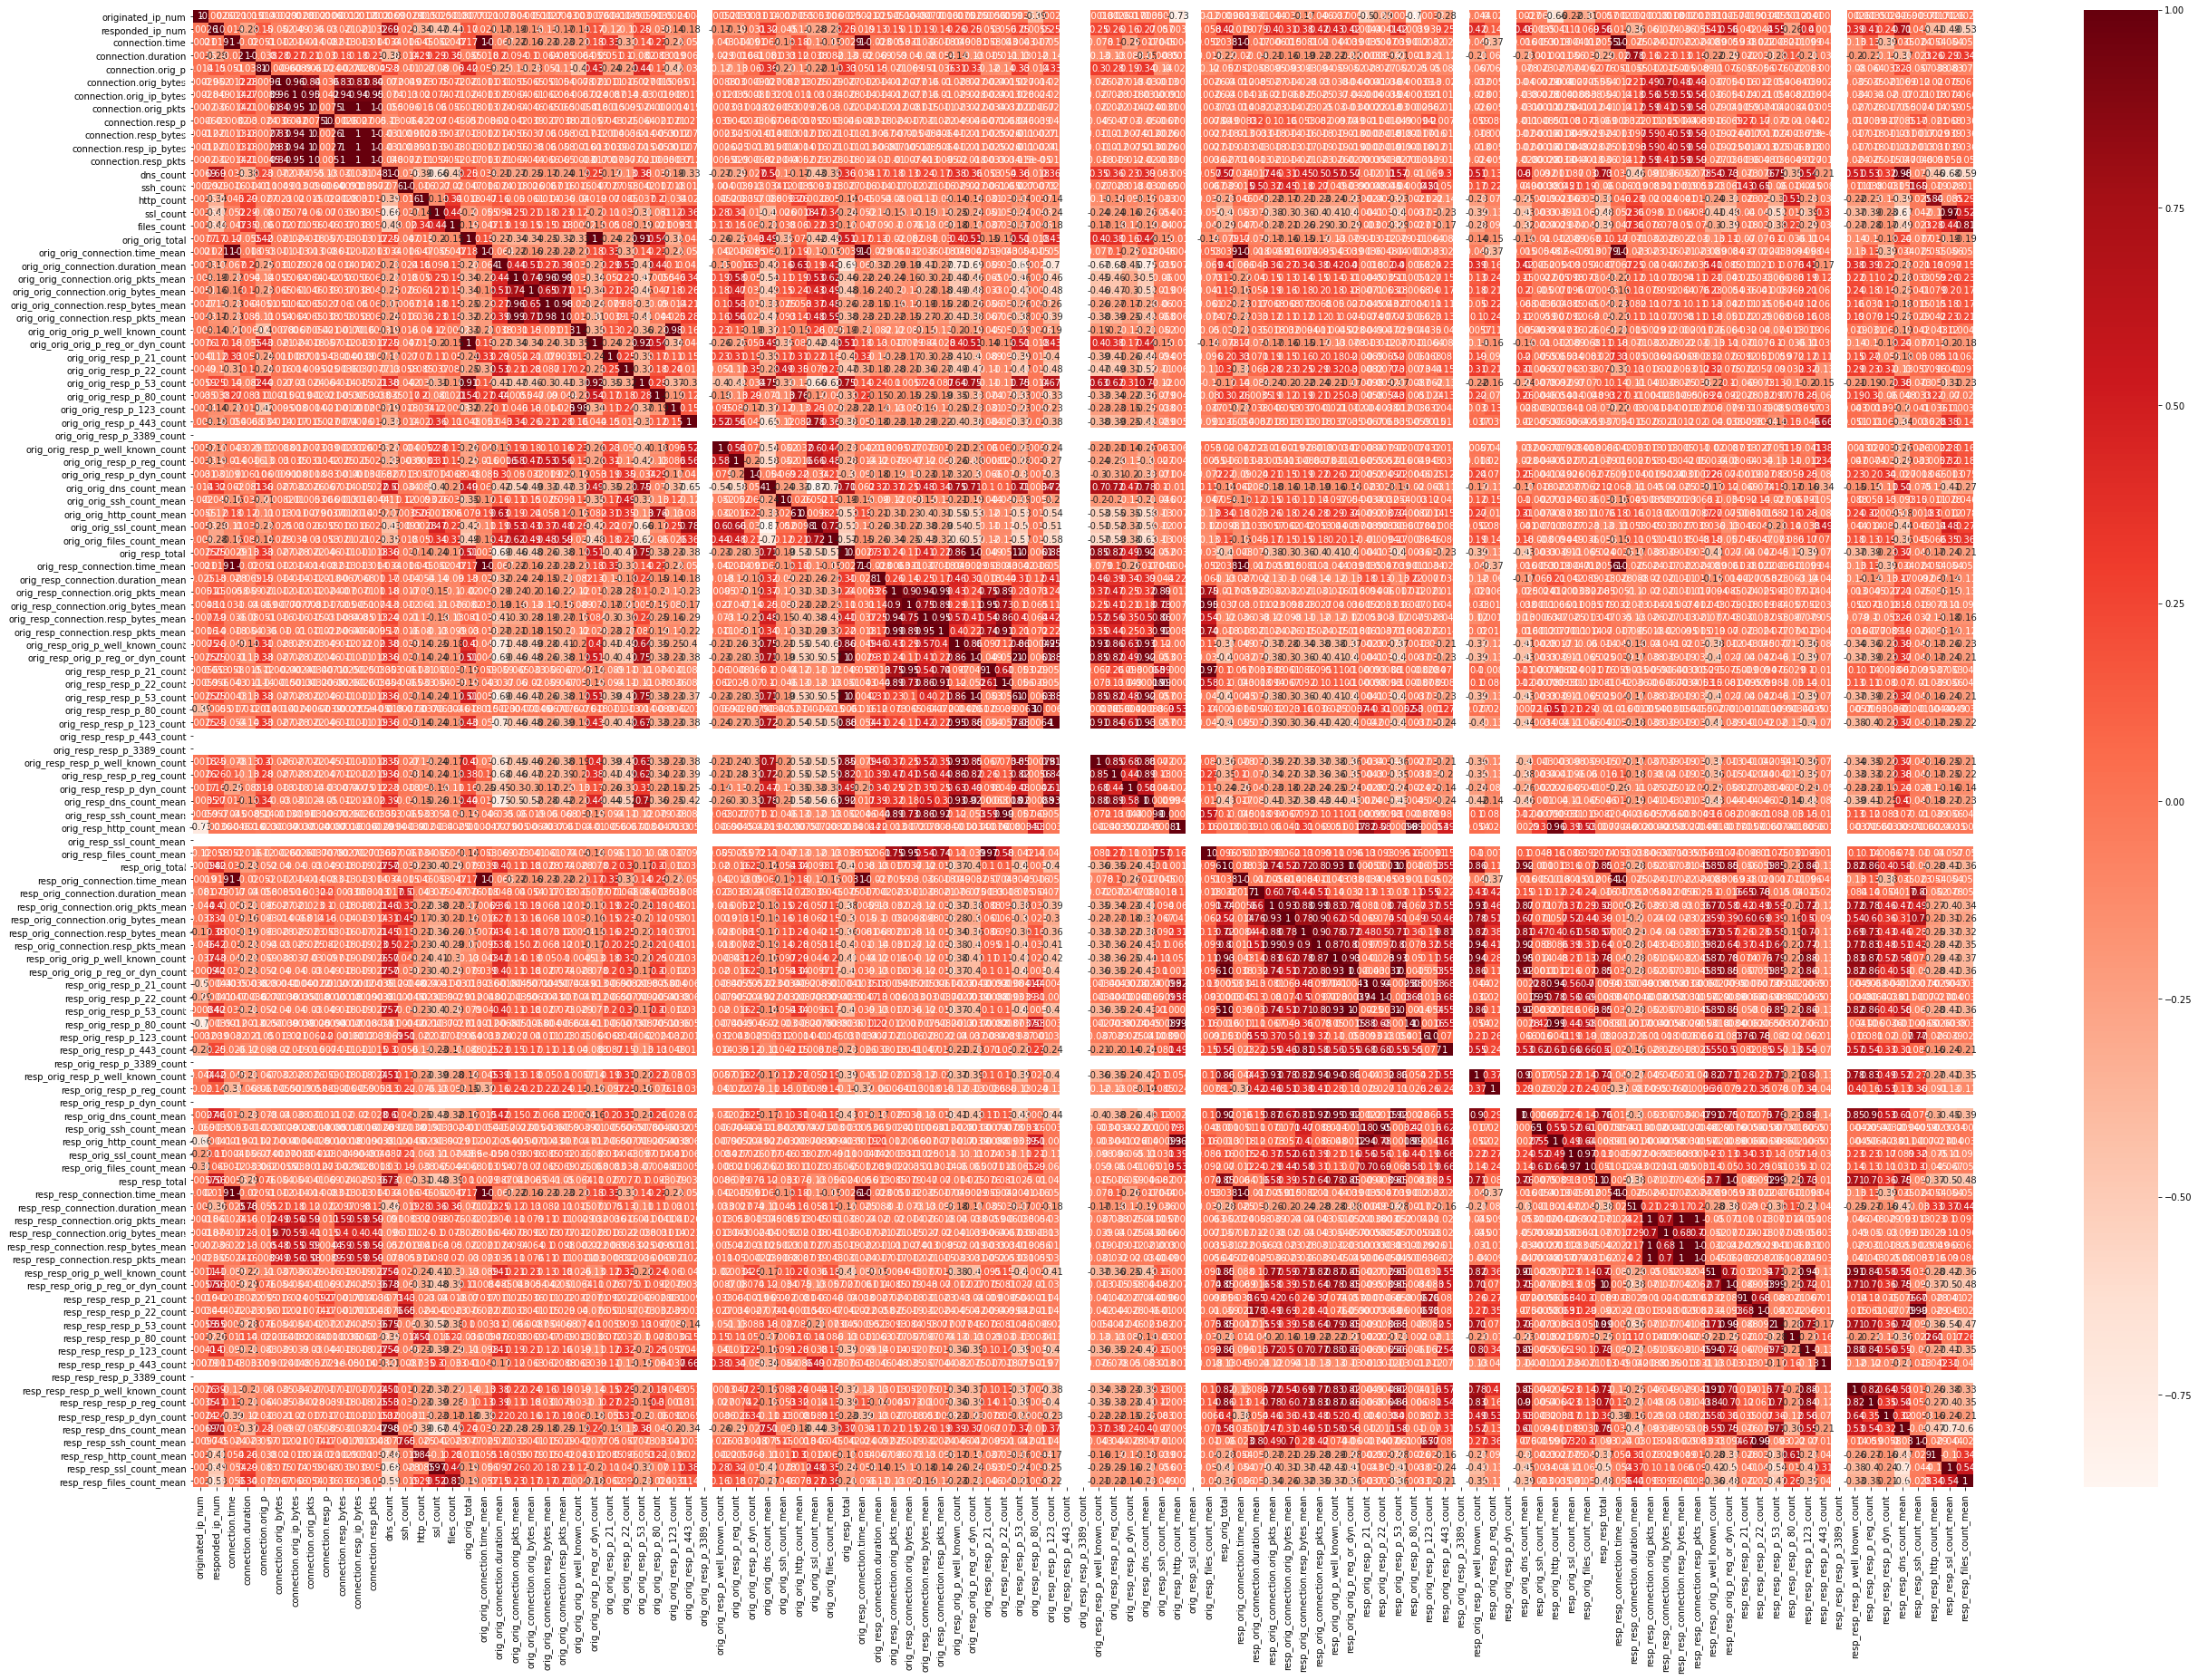

In [54]:
import seaborn as sns

# (https://medium.com/@sadievrenseker/preprocessing-end-to-end-data-preprocessing-1b0672087977)

plt.figure(figsize=(44,30))
cor = result_numerical.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# 6. Write the result to file

In [ ]:
result_final = pd.concat([result, data_orig], axis=1)
result_final

In [ ]:
for col in result_final.columns:
    print(col)

In [ ]:
result_final.to_csv('/home/sramkova/diploma_thesis_data/FINAL_neighbourhood_both_days_shh.csv', index=False, header=True)